# Regression Model Analysis for COVID-19 Prediction
## Assignment 2A: Case Study 3 
Using Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             roc_curve, auc, RocCurveDisplay)
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')



## Step 1: Data Loading and Preprocessing

In [2]:

print("STEP 1: DATA LOADING AND PREPROCESSING FOR REGRESSION MODELLING")


# Load the dataset
df = pd.read_csv('D2.csv')
print(f"\nOriginal dataset shape: {df.shape}")

# Display original data types
print("\n--- Original Data Types ---")
print(df.dtypes)

# Check for missing values
print("\n--- Missing Values Check ---")
missing = df.isnull().sum()
print(f"Total missing values: {missing.sum()}")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('covid19_positive')  # Remove target from features

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

STEP 1: DATA LOADING AND PREPROCESSING FOR REGRESSION MODELLING

Original dataset shape: (5789, 13)

--- Original Data Types ---
gender               object
age                  object
height                int64
weight                int64
blood_type           object
insurance            object
income               object
smoking              object
alcohol             float64
contacts_count      float64
working              object
worried             float64
covid19_positive      int64
dtype: object

--- Missing Values Check ---
Total missing values: 0

Categorical columns: ['gender', 'age', 'blood_type', 'insurance', 'income', 'smoking', 'working']
Numerical columns: ['height', 'weight', 'alcohol', 'contacts_count', 'worried']


In [3]:
# Preprocessing for Regression Modelling
print("\n--- Data Preprocessing Steps Applied for Regression ---")

# Create a copy for processing
df_processed = df.copy()

# 1. Encode categorical variables using Label Encoding
print("\n1. Label Encoding for categorical variables:")
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"   {col}: {len(le.classes_)} categories encoded")

print("\n2. No missing values to handle")


--- Data Preprocessing Steps Applied for Regression ---

1. Label Encoding for categorical variables:
   gender: 3 categories encoded
   age: 9 categories encoded
   blood_type: 9 categories encoded
   insurance: 2 categories encoded
   income: 4 categories encoded
   smoking: 8 categories encoded
   working: 5 categories encoded

2. No missing values to handle


## Step 2: Data Distribution (Train/Test Split)

In [4]:

print("STEP 2: DATA DISTRIBUTION - TRAIN/TEST SPLIT")


# Separate features and target
X = df_processed.drop('covid19_positive', axis=1)
y = df_processed['covid19_positive']

# Split data using stratified sampling (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n--- Distribution Split: 80% Training, 20% Testing ---")
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

print(f"\n--- Stratified Sampling Verification ---")
print(f"Training set - COVID Positive: {y_train.sum()} ({y_train.mean()*100:.1f}%)")
print(f"Test set - COVID Positive: {y_test.sum()} ({y_test.mean()*100:.1f}%)")

STEP 2: DATA DISTRIBUTION - TRAIN/TEST SPLIT

--- Distribution Split: 80% Training, 20% Testing ---
Training set size: 4631 samples (80.0%)
Test set size: 1158 samples (20.0%)

--- Stratified Sampling Verification ---
Training set - COVID Positive: 1868 (40.3%)
Test set - COVID Positive: 467 (40.3%)


## Step 3: Standardisation of Variables

In [6]:

print("STEP 3: STANDARDISATION OF VARIABLES")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)



print("\n--- Before vs After Standardisation (Sample Statistics) ---")
print(f"Original - Height mean: {X_train['height'].mean():.2f}, std: {X_train['height'].std():.2f}")
print(f"Scaled - Height mean: {X_train_scaled_df['height'].mean():.6f}, std: {X_train_scaled_df['height'].std():.2f}")

STEP 3: STANDARDISATION OF VARIABLES

--- Before vs After Standardisation (Sample Statistics) ---
Original - Height mean: 171.91, std: 10.98
Scaled - Height mean: 0.000000, std: 1.00


## Model 1: Default Logistic Regression (All Inputs)

In [7]:

print("MODEL 1: DEFAULT LOGISTIC REGRESSION (ALL INPUTS)")


# Build default logistic regression
lr_default = LogisticRegression(random_state=42, max_iter=1000)
lr_default.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_default = lr_default.predict(X_train_scaled)
y_test_pred_default = lr_default.predict(X_test_scaled)

# Calculate accuracies
train_acc_default = accuracy_score(y_train, y_train_pred_default)
test_acc_default = accuracy_score(y_test, y_test_pred_default)

print("\n--- Default Model Parameters ---")
print(f"penalty: {lr_default.penalty}")
print(f"C (inverse regularization): {lr_default.C}")
print(f"solver: {lr_default.solver}")
print(f"max_iter: {lr_default.max_iter}")

print("\n--- Classification Accuracy ---")
print(f"Training Accuracy: {train_acc_default*100:.2f}%")
print(f"Test Accuracy: {test_acc_default*100:.2f}%")

print("\n--- Variables Included ---")
print(f"All {len(X.columns)} variables: {list(X.columns)}")

MODEL 1: DEFAULT LOGISTIC REGRESSION (ALL INPUTS)

--- Default Model Parameters ---
penalty: deprecated
C (inverse regularization): 1.0
solver: lbfgs
max_iter: 1000

--- Classification Accuracy ---
Training Accuracy: 67.57%
Test Accuracy: 65.98%

--- Variables Included ---
All 12 variables: ['gender', 'age', 'height', 'weight', 'blood_type', 'insurance', 'income', 'smoking', 'alcohol', 'contacts_count', 'working', 'worried']


In [8]:
print("\n--- Confusion Matrix (Test Set) ---")
cm_default = confusion_matrix(y_test, y_test_pred_default)
print(f"                  Predicted")
print(f"              Negative  Positive")
print(f"Actual Neg      {cm_default[0,0]:5d}     {cm_default[0,1]:5d}")
print(f"Actual Pos      {cm_default[1,0]:5d}     {cm_default[1,1]:5d}")

print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_test_pred_default, target_names=['Negative', 'Positive']))

# Feature importance (coefficients)
feature_importance_default = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_default.coef_[0],
    'Abs_Coefficient': np.abs(lr_default.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n--- Top 5 Important Variables (by absolute coefficient) ---")
print(feature_importance_default.head(5)[['Feature', 'Coefficient']].to_string(index=False))


--- Confusion Matrix (Test Set) ---
                  Predicted
              Negative  Positive
Actual Neg        524       167
Actual Pos        227       240

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73       691
    Positive       0.59      0.51      0.55       467

    accuracy                           0.66      1158
   macro avg       0.64      0.64      0.64      1158
weighted avg       0.65      0.66      0.66      1158


--- Top 5 Important Variables (by absolute coefficient) ---
Feature  Coefficient
 income     0.612969
 weight     0.363384
 height    -0.266383
    age    -0.230421
worried     0.130299


## Model 2: Tuned Logistic Regression with GridSearchCV

In [9]:

print("MODEL 2: TUNED LOGISTIC REGRESSION WITH GRIDSEARCHCV")


# Define parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

print("\n--- GridSearchCV Parameter Grid ---")
for param, values in param_grid.items():
    print(f"{param}: {values}")

# Perform GridSearchCV with 5-fold cross-validation
print("\nPerforming GridSearchCV with 5-fold cross-validation...")
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
lr_tuned = grid_search.best_estimator_

# Predictions with tuned model
y_train_pred_tuned = lr_tuned.predict(X_train_scaled)
y_test_pred_tuned = lr_tuned.predict(X_test_scaled)

# Calculate accuracies
train_acc_tuned = accuracy_score(y_train, y_train_pred_tuned)
test_acc_tuned = accuracy_score(y_test, y_test_pred_tuned)

print("\n--- Best Parameters Found ---")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search.best_score_*100:.2f}%")

print("\n--- Classification Accuracy ---")
print(f"Training Accuracy: {train_acc_tuned*100:.2f}%")
print(f"Test Accuracy: {test_acc_tuned*100:.2f}%")

MODEL 2: TUNED LOGISTIC REGRESSION WITH GRIDSEARCHCV

--- GridSearchCV Parameter Grid ---
penalty: ['l1', 'l2']
C: [0.001, 0.01, 0.1, 1, 10, 100]
solver: ['liblinear', 'saga']
max_iter: [1000]

Performing GridSearchCV with 5-fold cross-validation...

--- Best Parameters Found ---
C: 0.001
max_iter: 1000
penalty: l2
solver: liblinear

Best Cross-Validation Score: 67.03%

--- Classification Accuracy ---
Training Accuracy: 67.63%
Test Accuracy: 65.80%


In [10]:
print("\n--- Confusion Matrix (Test Set) ---")
cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)
print(f"                  Predicted")
print(f"              Negative  Positive")
print(f"Actual Neg      {cm_tuned[0,0]:5d}     {cm_tuned[0,1]:5d}")
print(f"Actual Pos      {cm_tuned[1,0]:5d}     {cm_tuned[1,1]:5d}")

print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_test_pred_tuned, target_names=['Negative', 'Positive']))

# Feature importance (coefficients)
feature_importance_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_tuned.coef_[0],
    'Abs_Coefficient': np.abs(lr_tuned.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n--- Top 5 Important Variables (by absolute coefficient) ---")
print(feature_importance_tuned.head(5)[['Feature', 'Coefficient']].to_string(index=False))


--- Confusion Matrix (Test Set) ---
                  Predicted
              Negative  Positive
Actual Neg        499       192
Actual Pos        204       263

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.72       691
    Positive       0.58      0.56      0.57       467

    accuracy                           0.66      1158
   macro avg       0.64      0.64      0.64      1158
weighted avg       0.66      0.66      0.66      1158


--- Top 5 Important Variables (by absolute coefficient) ---
Feature  Coefficient
 income     0.302637
 weight     0.159005
    age    -0.121564
worried     0.080009
 height    -0.075069


## Overfitting Analysis

In [11]:

print("OVERFITTING ANALYSIS")


print(f"\nDefault Model:")
print(f"  Training Accuracy: {train_acc_default*100:.2f}%")
print(f"  Test Accuracy: {test_acc_default*100:.2f}%")
print(f"  Difference: {(train_acc_default - test_acc_default)*100:.2f}%")
if train_acc_default - test_acc_default > 0.05:
    print("  >> Evidence of overfitting")
else:
    print("  >> No significant overfitting detected")

print(f"\nTuned Model:")
print(f"  Training Accuracy: {train_acc_tuned*100:.2f}%")
print(f"  Test Accuracy: {test_acc_tuned*100:.2f}%")
print(f"  Difference: {(train_acc_tuned - test_acc_tuned)*100:.2f}%")
if train_acc_tuned - test_acc_tuned > 0.05:
    print("  >> Evidence of overfitting")
else:
    print("  >> No significant overfitting detected")

OVERFITTING ANALYSIS

Default Model:
  Training Accuracy: 67.57%
  Test Accuracy: 65.98%
  Difference: 1.59%
  >> No significant overfitting detected

Tuned Model:
  Training Accuracy: 67.63%
  Test Accuracy: 65.80%
  Difference: 1.83%
  >> No significant overfitting detected


## Model Selection

In [12]:

print("MODEL SELECTION")


# Compare models
if test_acc_tuned >= test_acc_default:
    better_model = "Tuned Model"
    selected_model = lr_tuned
    selected_importance = feature_importance_tuned
else:
    better_model = "Default Model"
    selected_model = lr_default
    selected_importance = feature_importance_default


print(f"\nRegression function used: Logistic Regression (Sigmoid function)")
print(f"Mathematical form: P(y=1|x) = 1 / (1 + e^(-z)) where z = b0 + b1x1 + ... + bnxn")

MODEL SELECTION

Regression function used: Logistic Regression (Sigmoid function)
Mathematical form: P(y=1|x) = 1 / (1 + e^(-z)) where z = b0 + b1x1 + ... + bnxn


## Model 3: Regression with Dimensionality Reduction (RFE)

In [13]:

print("MODEL 3: REGRESSION WITH DIMENSIONALITY REDUCTION (RFE)")


print("\n--- Recursive Feature Elimination (RFE) ---")


# Use RFECV to find optimal number of features
print("\nFinding optimal number of features with RFECV")
rfecv = RFECV(
    estimator=LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'),
    step=1,
    cv=5,
    scoring='accuracy',
    min_features_to_select=3
)
rfecv.fit(X_train_scaled, y_train)

print(f"\nOptimal number of features: {rfecv.n_features_}")
print(f"Features selected: {list(X.columns[rfecv.support_])}")
print(f"Features eliminated: {list(X.columns[~rfecv.support_])}")

# Get selected features
X_train_rfe = X_train_scaled[:, rfecv.support_]
X_test_rfe = X_test_scaled[:, rfecv.support_]
selected_features = X.columns[rfecv.support_]

MODEL 3: REGRESSION WITH DIMENSIONALITY REDUCTION (RFE)

--- Recursive Feature Elimination (RFE) ---

Finding optimal number of features with RFECV

Optimal number of features: 11
Features selected: ['gender', 'age', 'height', 'weight', 'insurance', 'income', 'smoking', 'alcohol', 'contacts_count', 'working', 'worried']
Features eliminated: ['blood_type']


In [14]:
# Now tune the model with GridSearchCV on reduced features
print("\n--- Tuning Model on Reduced Feature Set with GridSearchCV ---")
param_grid_rfe = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

grid_search_rfe = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_rfe,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search_rfe.fit(X_train_rfe, y_train)

lr_rfe = grid_search_rfe.best_estimator_

# Predictions
y_train_pred_rfe = lr_rfe.predict(X_train_rfe)
y_test_pred_rfe = lr_rfe.predict(X_test_rfe)

# Calculate accuracies
train_acc_rfe = accuracy_score(y_train, y_train_pred_rfe)
test_acc_rfe = accuracy_score(y_test, y_test_pred_rfe)

print("\n--- Best Parameters for RFE Model ---")
for param, value in grid_search_rfe.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search_rfe.best_score_*100:.2f}%")

print("\n--- Classification Accuracy ---")
print(f"Training Accuracy: {train_acc_rfe*100:.2f}%")
print(f"Test Accuracy: {test_acc_rfe*100:.2f}%")


--- Tuning Model on Reduced Feature Set with GridSearchCV ---

--- Best Parameters for RFE Model ---
C: 0.001
max_iter: 1000
penalty: l2
solver: liblinear

Best Cross-Validation Score: 67.24%

--- Classification Accuracy ---
Training Accuracy: 67.65%
Test Accuracy: 66.15%


In [15]:
print("\n--- Confusion Matrix (Test Set) ---")
cm_rfe = confusion_matrix(y_test, y_test_pred_rfe)
print(f"                  Predicted")
print(f"              Negative  Positive")
print(f"Actual Neg      {cm_rfe[0,0]:5d}     {cm_rfe[0,1]:5d}")
print(f"Actual Pos      {cm_rfe[1,0]:5d}     {cm_rfe[1,1]:5d}")

print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_test_pred_rfe, target_names=['Negative', 'Positive']))

# Feature importance for RFE model
feature_importance_rfe = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr_rfe.coef_[0],
    'Abs_Coefficient': np.abs(lr_rfe.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n--- Top 3 Important Variables (by absolute coefficient) ---")
print(feature_importance_rfe.head(3)[['Feature', 'Coefficient']].to_string(index=False))


--- Confusion Matrix (Test Set) ---
                  Predicted
              Negative  Positive
Actual Neg        502       189
Actual Pos        203       264

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

    Negative       0.71      0.73      0.72       691
    Positive       0.58      0.57      0.57       467

    accuracy                           0.66      1158
   macro avg       0.65      0.65      0.65      1158
weighted avg       0.66      0.66      0.66      1158


--- Top 3 Important Variables (by absolute coefficient) ---
Feature  Coefficient
 income     0.302710
 weight     0.159094
    age    -0.122086


In [16]:
# Overfitting analysis for RFE model
print("\n--- Overfitting Analysis for RFE Model ---")
print(f"Training Accuracy: {train_acc_rfe*100:.2f}%")
print(f"Test Accuracy: {test_acc_rfe*100:.2f}%")
print(f"Difference: {(train_acc_rfe - test_acc_rfe)*100:.2f}%")
if train_acc_rfe - test_acc_rfe > 0.05:
    print(">> Evidence of overfitting")
else:
    print(">> No significant overfitting detected")

# Was dimensionality reduction useful?
print("\n--- Dimensionality Reduction Evaluation ---")
print(f"Full model (12 features) - Test Accuracy: {test_acc_tuned*100:.2f}%")
print(f"Reduced model ({rfecv.n_features_} features) - Test Accuracy: {test_acc_rfe*100:.2f}%")



--- Overfitting Analysis for RFE Model ---
Training Accuracy: 67.65%
Test Accuracy: 66.15%
Difference: 1.50%
>> No significant overfitting detected

--- Dimensionality Reduction Evaluation ---
Full model (12 features) - Test Accuracy: 65.80%
Reduced model (11 features) - Test Accuracy: 66.15%


## ROC Curves for All Models

In [17]:

print("ROC CURVES FOR ALL REGRESSION MODELS")


# Calculate ROC curves
y_prob_default = lr_default.predict_proba(X_test_scaled)[:, 1]
fpr_default, tpr_default, _ = roc_curve(y_test, y_prob_default)
roc_auc_default = auc(fpr_default, tpr_default)

y_prob_tuned = lr_tuned.predict_proba(X_test_scaled)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

y_prob_rfe = lr_rfe.predict_proba(X_test_rfe)[:, 1]
fpr_rfe, tpr_rfe, _ = roc_curve(y_test, y_prob_rfe)
roc_auc_rfe = auc(fpr_rfe, tpr_rfe)

print(f"\n--- AUC Scores ---")
print(f"Default Logistic Regression AUC: {roc_auc_default:.4f}")
print(f"Tuned Logistic Regression AUC: {roc_auc_tuned:.4f}")
print(f"RFE + Tuned Logistic Regression AUC: {roc_auc_rfe:.4f}")

ROC CURVES FOR ALL REGRESSION MODELS

--- AUC Scores ---
Default Logistic Regression AUC: 0.7030
Tuned Logistic Regression AUC: 0.7036
RFE + Tuned Logistic Regression AUC: 0.7044


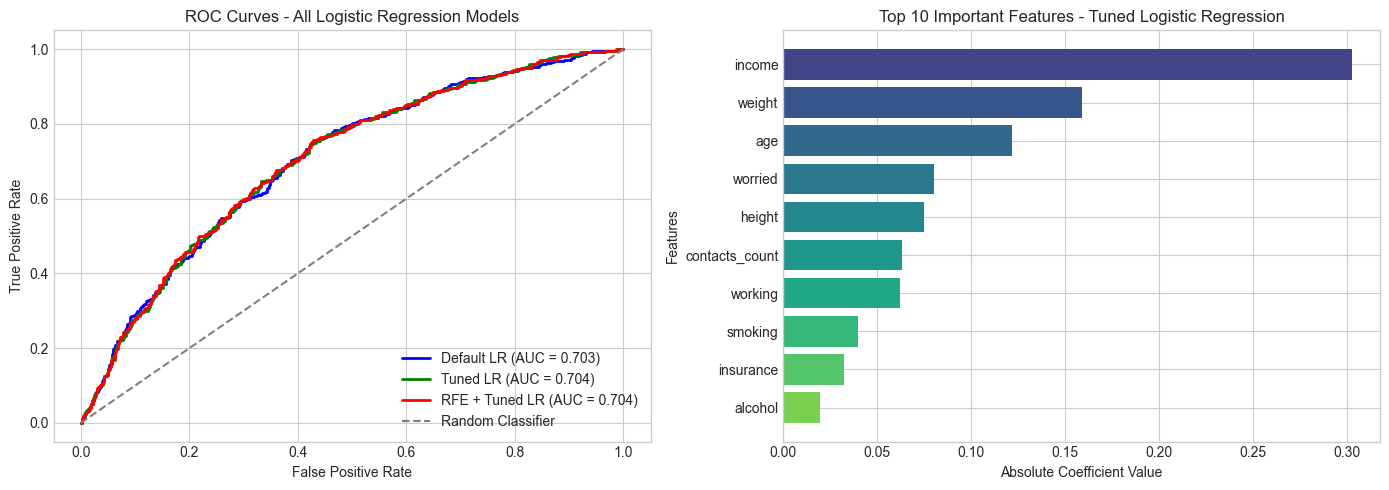

In [18]:
# Create ROC curve plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual ROC curves
ax1 = axes[0]
ax1.plot(fpr_default, tpr_default, color='blue', lw=2, 
         label=f'Default LR (AUC = {roc_auc_default:.3f})')
ax1.plot(fpr_tuned, tpr_tuned, color='green', lw=2, 
         label=f'Tuned LR (AUC = {roc_auc_tuned:.3f})')
ax1.plot(fpr_rfe, tpr_rfe, color='red', lw=2, 
         label=f'RFE + Tuned LR (AUC = {roc_auc_rfe:.3f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves - All Logistic Regression Models')
ax1.legend(loc='lower right')
ax1.grid(True)

# Feature importance comparison
ax2 = axes[1]
top_features = feature_importance_tuned.head(10)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_features)))
bars = ax2.barh(range(len(top_features)), top_features['Abs_Coefficient'].values, color=colors)
ax2.set_yticks(range(len(top_features)))
ax2.set_yticklabels(top_features['Feature'].values)
ax2.set_xlabel('Absolute Coefficient Value')
ax2.set_ylabel('Features')
ax2.set_title('Top 10 Important Features - Tuned Logistic Regression')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('regression_roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()

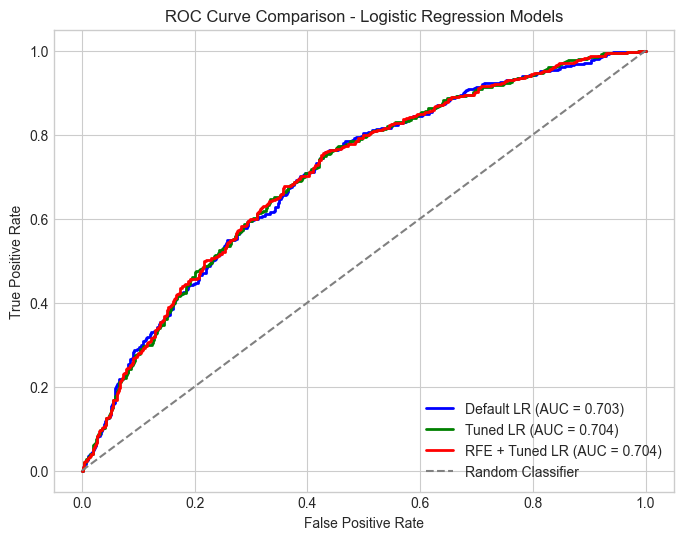

In [19]:
# Combined ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, color='blue', lw=2, 
         label=f'Default LR (AUC = {roc_auc_default:.3f})')
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, 
         label=f'Tuned LR (AUC = {roc_auc_tuned:.3f})')
plt.plot(fpr_rfe, tpr_rfe, color='red', lw=2, 
         label=f'RFE + Tuned LR (AUC = {roc_auc_rfe:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Logistic Regression Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('regression_roc_combined.png', dpi=150, bbox_inches='tight')
plt.show()

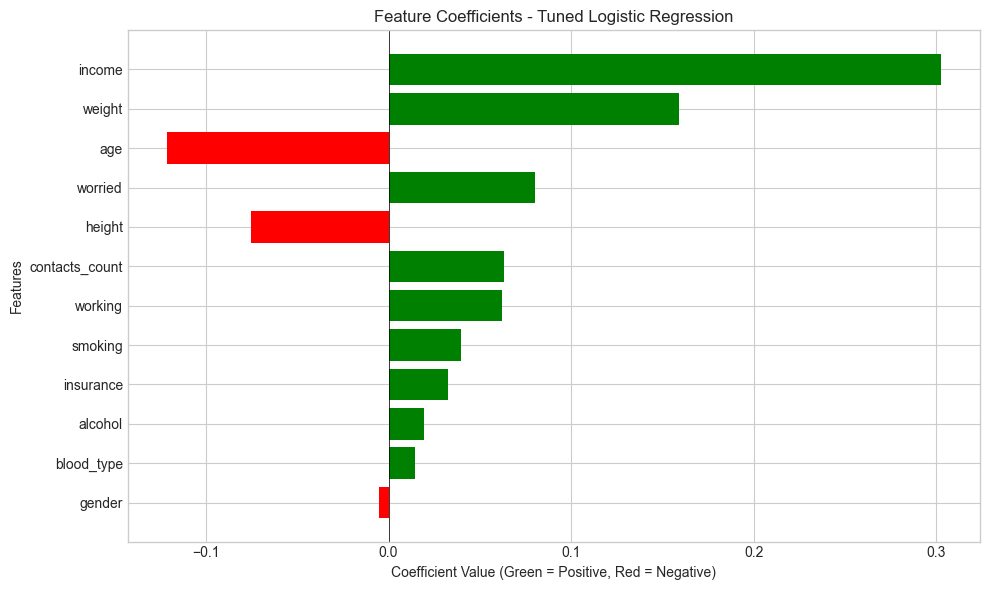

In [20]:
# Feature importance bar chart
plt.figure(figsize=(10, 6))
top_features = feature_importance_tuned.head(12)
colors = ['green' if c > 0 else 'red' for c in top_features['Coefficient'].values]
plt.barh(range(len(top_features)), top_features['Coefficient'].values, color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Coefficient Value (Green = Positive, Red = Negative)')
plt.ylabel('Features')
plt.title('Feature Coefficients - Tuned Logistic Regression')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('regression_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

## Characteristics of COVID Positive Individuals

In [21]:

print("CHARACTERISTICS OF COVID POSITIVE INDIVIDUALS")

# Determine best model
best_models = [
    ('Default LR', test_acc_default, roc_auc_default),
    ('Tuned LR', test_acc_tuned, roc_auc_tuned),
    ('RFE + Tuned LR', test_acc_rfe, roc_auc_rfe)
]
best_model_info = max(best_models, key=lambda x: x[2])  # Best by AUC
print(f"\nBest Model (by AUC): {best_model_info[0]}")
print(f"Test Accuracy: {best_model_info[1]*100:.2f}%")
print(f"AUC Score: {best_model_info[2]:.4f}")


print("\n--- Feature Analysis for COVID Positive Prediction ---")
# Use tuned model coefficients
print("\nTop factors INCREASING COVID positive probability:")
positive_factors = feature_importance_tuned[feature_importance_tuned['Coefficient'] > 0].head(5)
for _, row in positive_factors.iterrows():
    print(f"  {row['Feature']}: coefficient = {row['Coefficient']:.4f}")

print("\nTop factors DECREASING COVID positive probability:")
negative_factors = feature_importance_tuned[feature_importance_tuned['Coefficient'] < 0].head(5)
for _, row in negative_factors.iterrows():
    print(f"  {row['Feature']}: coefficient = {row['Coefficient']:.4f}")

CHARACTERISTICS OF COVID POSITIVE INDIVIDUALS

Best Model (by AUC): RFE + Tuned LR
Test Accuracy: 66.15%
AUC Score: 0.7044

--- Feature Analysis for COVID Positive Prediction ---

Top factors INCREASING COVID positive probability:
  income: coefficient = 0.3026
  weight: coefficient = 0.1590
  worried: coefficient = 0.0800
  contacts_count: coefficient = 0.0633
  working: coefficient = 0.0623

Top factors DECREASING COVID positive probability:
  age: coefficient = -0.1216
  height: coefficient = -0.0751
  gender: coefficient = -0.0052


In [22]:
# Analyze characteristics from original data
print("\n--- Characteristics of COVID Positive Individuals ---")
covid_positive = df[df['covid19_positive'] == 1]
covid_negative = df[df['covid19_positive'] == 0]

print("\n1. Demographics:")
print(f"   Gender distribution (COVID Positive):")
print(f"   {covid_positive['gender'].value_counts(normalize=True).round(3).to_dict()}")
print(f"   Age distribution (COVID Positive):")
age_dist = covid_positive['age'].value_counts(normalize=True).round(3).head(5)
print(f"   {age_dist.to_dict()}")

print("\n2. Income Level (Most Important Predictor):")
print(f"   COVID Positive: {covid_positive['income'].value_counts(normalize=True).round(3).to_dict()}")
print(f"   COVID Negative: {covid_negative['income'].value_counts(normalize=True).round(3).to_dict()}")

print("\n3. Contact & Worry Patterns:")
print(f"   Average contacts count - Positive: {covid_positive['contacts_count'].mean():.2f}")
print(f"   Average contacts count - Negative: {covid_negative['contacts_count'].mean():.2f}")
print(f"   Average worry level - Positive: {covid_positive['worried'].mean():.2f}")
print(f"   Average worry level - Negative: {covid_negative['worried'].mean():.2f}")

print("\n4. Working Status:")
print(f"   COVID Positive: {covid_positive['working'].value_counts(normalize=True).round(3).to_dict()}")


--- Characteristics of COVID Positive Individuals ---

1. Demographics:
   Gender distribution (COVID Positive):
   {'female': 0.504, 'male': 0.492, 'other': 0.004}
   Age distribution (COVID Positive):
   {'30_40': 0.271, '20_30': 0.217, '40_50': 0.181, '50_60': 0.158, '60_70': 0.095}

2. Income Level (Most Important Predictor):
   COVID Positive: {'med': 0.772, 'high': 0.149, 'low': 0.061, 'gov': 0.018}
   COVID Negative: {'med': 0.467, 'high': 0.446, 'low': 0.074, 'gov': 0.013}

3. Contact & Worry Patterns:
   Average contacts count - Positive: 8.57
   Average contacts count - Negative: 7.48
   Average worry level - Positive: 3.72
   Average worry level - Negative: 3.57

4. Working Status:
   COVID Positive: {'travel critical': 0.309, 'stopped': 0.297, 'never': 0.239, 'travel non critical': 0.091, 'home': 0.064}


## Summary Comparison of All Regression Models

In [23]:

print("SUMMARY COMPARISON OF ALL REGRESSION MODELS")


comparison_df = pd.DataFrame({
    'Model': ['Default LR', 'Tuned LR', 'RFE + Tuned LR'],
    'Features': [12, 12, rfecv.n_features_],
    'Train Acc': [f"{train_acc_default*100:.2f}%", f"{train_acc_tuned*100:.2f}%", f"{train_acc_rfe*100:.2f}%"],
    'Test Acc': [f"{test_acc_default*100:.2f}%", f"{test_acc_tuned*100:.2f}%", f"{test_acc_rfe*100:.2f}%"],
    'AUC': [f"{roc_auc_default:.4f}", f"{roc_auc_tuned:.4f}", f"{roc_auc_rfe:.4f}"],
    'Overfitting': [
        'Yes' if train_acc_default - test_acc_default > 0.05 else 'No',
        'Yes' if train_acc_tuned - test_acc_tuned > 0.05 else 'No',
        'Yes' if train_acc_rfe - test_acc_rfe > 0.05 else 'No'
    ]
})
print("\n")
print(comparison_df.to_string(index=False))



SUMMARY COMPARISON OF ALL REGRESSION MODELS


         Model  Features Train Acc Test Acc    AUC Overfitting
    Default LR        12    67.57%   65.98% 0.7030          No
      Tuned LR        12    67.63%   65.80% 0.7036          No
RFE + Tuned LR        11    67.65%   66.15% 0.7044          No
